<a href="https://www.kaggle.com/code/jasonfm26/evaluating-models-on-the-512x512-dataset?scriptVersionId=153412566" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Loading the datasest using Kaggle API

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/













In [ ]:
!mkdir ~/.kaggle

In [ ]:
cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d jasonfm26/sample



 91% 24.0M/26.3M [00:02<00:00, 15.5MB/s]

100% 26.3M/26.3M [00:02<00:00, 11.2MB/s]


In [ ]:
!unzip /content/sample.zip

Archive:  /content/sample.zip

  inflating: 512 x 512/test.csv      

  inflating: 512 x 512/test/caries/wc1.jpg  

  inflating: 512 x 512/test/caries/wc1_0.jpg  

  inflating: 512 x 512/test/caries/wc1_1.jpg  

  inflating: 512 x 512/test/caries/wc1_10.jpg  

  inflating: 512 x 512/test/caries/wc1_11.jpg  

  inflating: 512 x 512/test/caries/wc1_12.jpg  

  inflating: 512 x 512/test/caries/wc1_13.jpg  

  inflating: 512 x 512/test/caries/wc1_14.jpg  

  inflating: 512 x 512/test/caries/wc1_15.jpg  

  inflating: 512 x 512/test/caries/wc1_16.jpg  

  inflating: 512 x 512/test/caries/wc1_17.jpg  

  inflating: 512 x 512/test/caries/wc1_18.jpg  

  inflating: 512 x 512/test/caries/wc1_19.jpg  

  inflating: 512 x 512/test/caries/wc1_2.jpg  

  inflating: 512 x 512/test/caries/wc1_3.jpg  

  inflating: 512 x 512/test/caries/wc1_4.jpg  

  inflating: 512 x 512/test/caries/wc1_5.jpg  

  inflating: 512 x 512/test/caries/wc1_6.jpg  

  inflating: 512 x 512/test/caries/wc1_7.jpg  

  inflatin

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

import warnings
warnings.filterwarnings('ignore')
import os
train_path = "/content/512 x 512/train/"
test_path = "/content/512 x 512/test"

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
from keras.utils.vis_utils import plot_model
from glob import glob

## Getting contents of training data

In [ ]:
x_data = []
y_data = []

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split("/")[-1])

data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████| 315/315 [00:01<00:00, 309.14it/s]

100%|██████████| 945/945 [00:02<00:00, 316.09it/s]


In [ ]:
data.shape

(1260, 2)

In [ ]:
from collections import Counter
Counter(y_data)

Counter({'no-caries': 315, 'caries': 945})

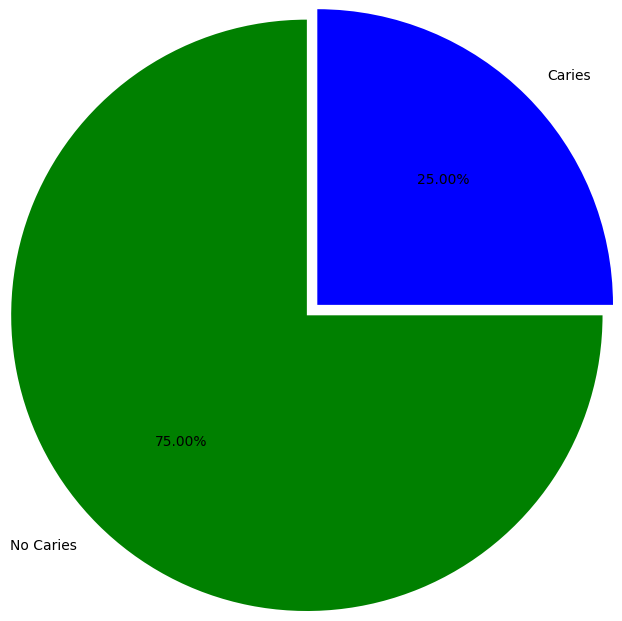

In [ ]:
colors = ['green','blue']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',labels=['No Caries', 'Caries'], colors= colors,radius=2)
plt.show()

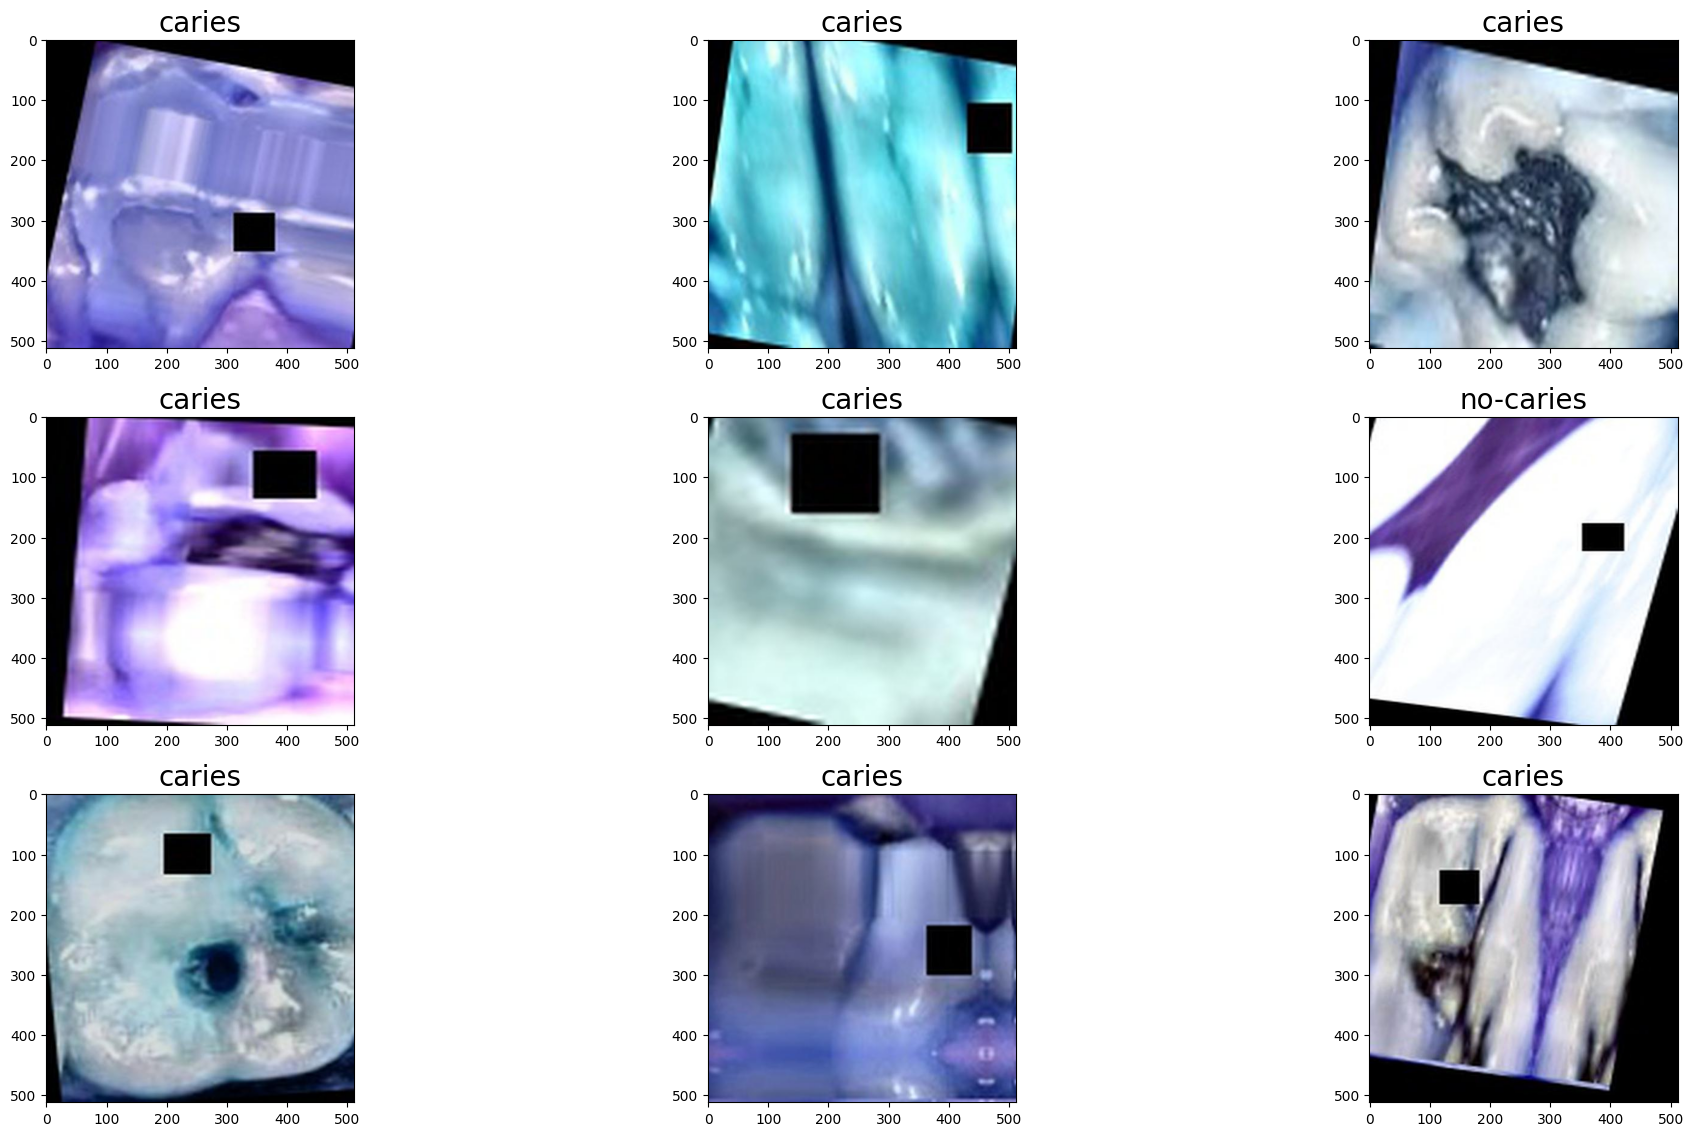

In [ ]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(1000)
    plt.title('{0}'.format(data.label[index]),fontdict={'size':20})
    plt.imshow(data.image[index])
    plt.tight_layout()

In [ ]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2


## Getting contents of testing data

In [ ]:
x_data = []
y_data = []

for category in glob(test_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split("/")[-1])

data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████| 84/84 [00:00<00:00, 227.22it/s]

100%|██████████| 210/210 [00:00<00:00, 324.32it/s]


In [ ]:
data.shape

(294, 2)

In [ ]:
from collections import Counter
Counter(y_data)

Counter({'no-caries': 84, 'caries': 210})

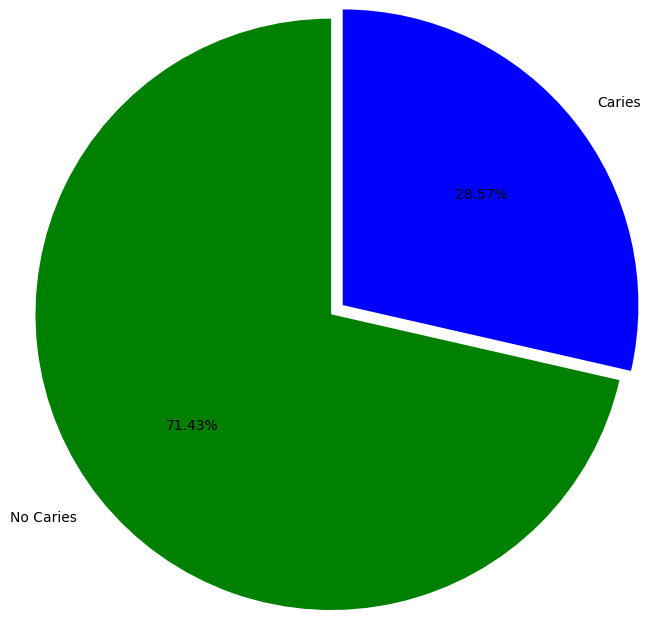

In [ ]:
colors = ['green','blue']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',labels=['No Caries', 'Caries'], colors= colors,radius=2)
plt.show()

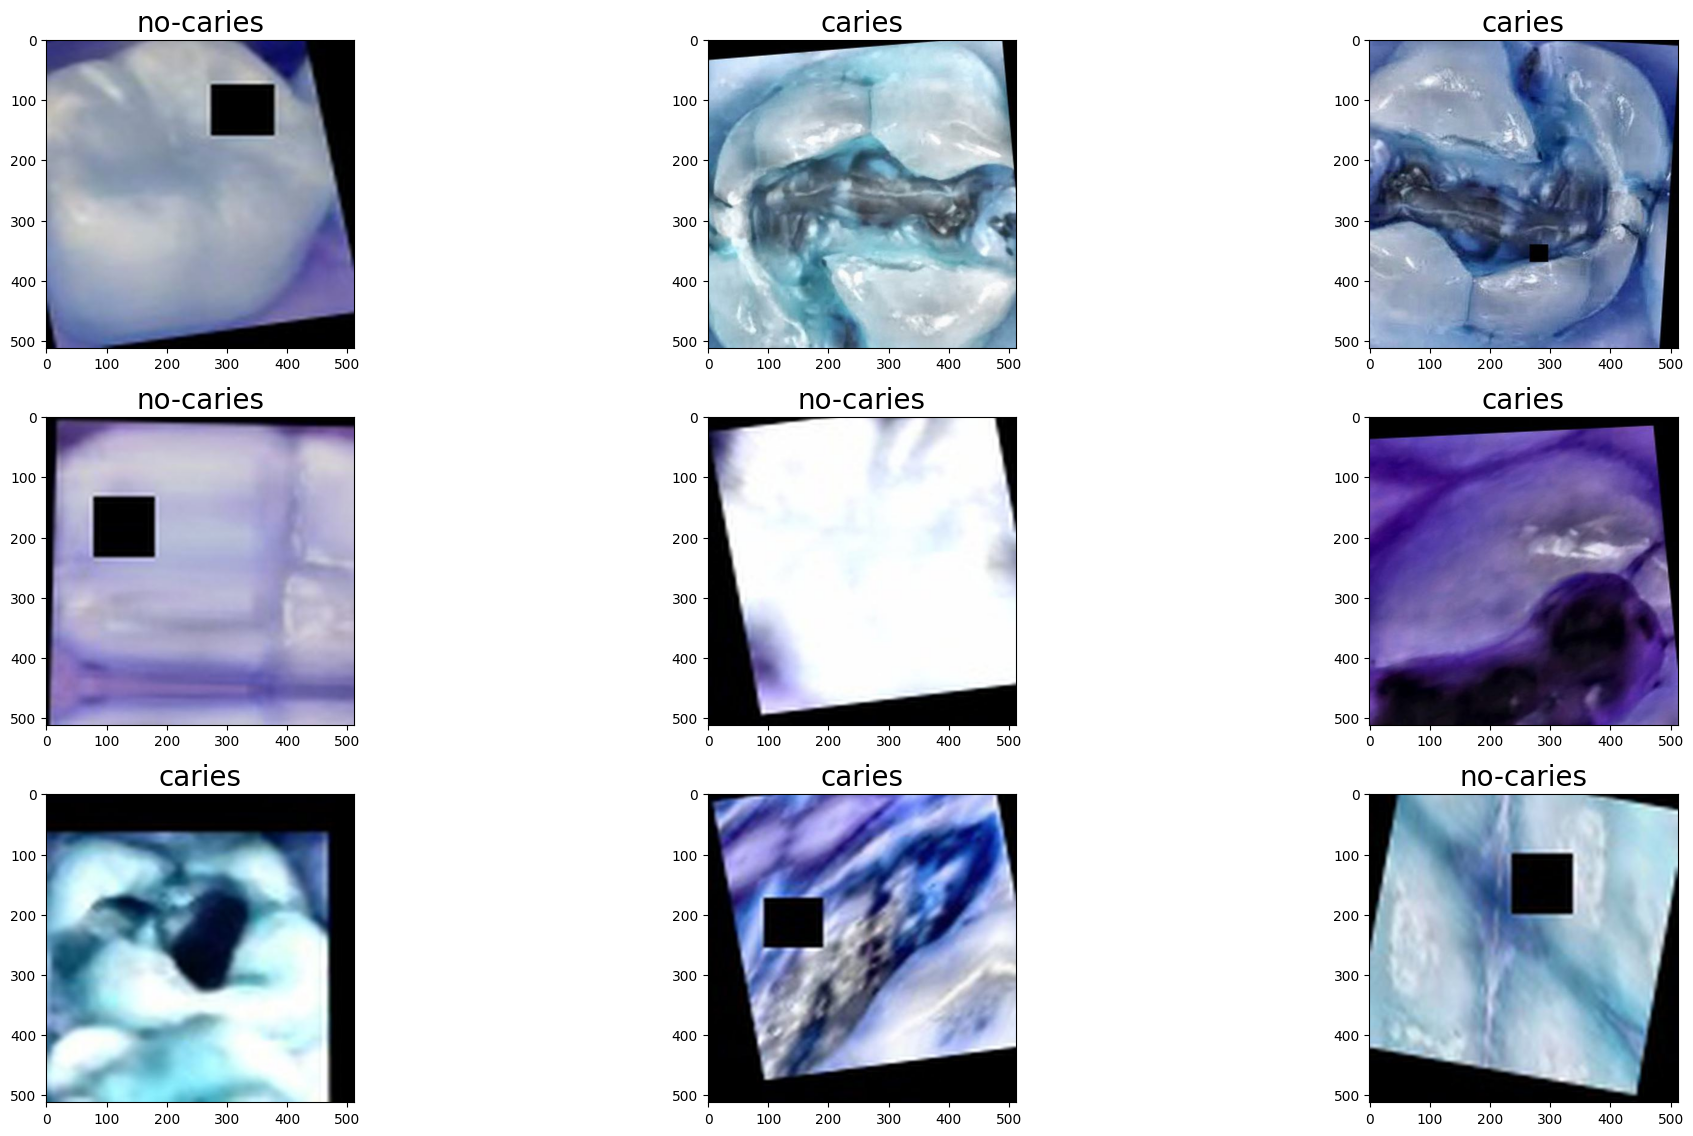

In [ ]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(294)
    plt.title('{0}'.format(data.label[index]),fontdict={'size':20})
    plt.imshow(data.image[index])
    plt.tight_layout()

# Model Building

## Image Augmentation

In [ ]:
train_generator = ImageDataGenerator(
    rescale = 1.0/255.,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    brightness_range=(0.5, 1.5),
)
test_generator = ImageDataGenerator(rescale=1./255.)


In [ ]:
train_datagen = train_generator.flow_from_directory(
    train_path,
    batch_size=10,
    target_size=(224, 224)
)
test_datagen = test_generator.flow_from_directory(
    test_path,
    batch_size=10,
    target_size=(224, 224)
)

Found 1260 images belonging to 2 classes.

Found 294 images belonging to 2 classes.


## Proposed CNN Model

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(512, 512, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

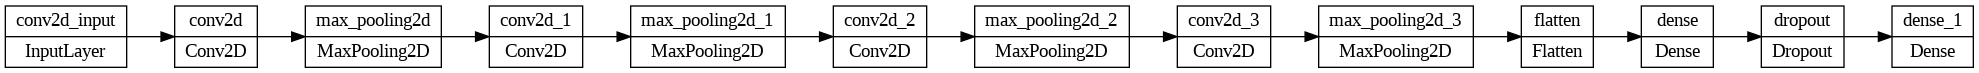

In [ ]:
plot_model(model, rankdir = "LR")

In [ ]:
model.summary()

Model: "sequential"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 conv2d (Conv2D)             (None, 222, 222, 32)      896       

                                                                 

 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         

 )                                                               

                                                                 

 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     

                                                                 

 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         

 2D)                                                             

                                                                 

 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     

                                                                 

 max_pooling2d_2 (MaxPooling  (None, 26,

In [ ]:
hist_cnn = model.fit_generator(generator = train_datagen,epochs=20,validation_data = test_datagen)

Epoch 1/20

126/126 [==============================] - 44s 258ms/step - loss: 0.6027 - accuracy: 0.7476 - val_loss: 0.5353 - val_accuracy: 0.7143

Epoch 2/20

126/126 [==============================] - 21s 170ms/step - loss: 0.5495 - accuracy: 0.7508 - val_loss: 0.5241 - val_accuracy: 0.7143

Epoch 3/20

126/126 [==============================] - 21s 163ms/step - loss: 0.5246 - accuracy: 0.7619 - val_loss: 0.6380 - val_accuracy: 0.7143

Epoch 4/20

126/126 [==============================] - 22s 171ms/step - loss: 0.4987 - accuracy: 0.7563 - val_loss: 0.4886 - val_accuracy: 0.7109

Epoch 5/20

126/126 [==============================] - 21s 169ms/step - loss: 0.5215 - accuracy: 0.7595 - val_loss: 0.5347 - val_accuracy: 0.6871

Epoch 6/20

126/126 [==============================] - 22s 171ms/step - loss: 0.5028 - accuracy: 0.7675 - val_loss: 0.4289 - val_accuracy: 0.7347

Epoch 7/20

126/126 [==============================] - 22s 172ms/step - loss: 0.4962 - accuracy: 0.7611 - val_loss: 0.

## Transfer Learning

### ResNet50

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(512, 512, 3))

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)

model_res = Model(inputs=base_model.input, outputs=predictions)

model_res.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist_res = model_res.fit(train_datagen, epochs=25, validation_data=test_datagen)


94765736/94765736 [==============================] - 5s 0us/step

Epoch 1/25

126/126 [==============================] - 30s 191ms/step - loss: 0.8587 - accuracy: 0.6095 - val_loss: 0.6313 - val_accuracy: 0.7143

Epoch 2/25

126/126 [==============================] - 23s 180ms/step - loss: 0.7091 - accuracy: 0.6849 - val_loss: 0.6676 - val_accuracy: 0.7143

Epoch 3/25

126/126 [==============================] - 23s 180ms/step - loss: 0.6387 - accuracy: 0.7111 - val_loss: 0.7164 - val_accuracy: 0.7143

Epoch 4/25

126/126 [==============================] - 23s 179ms/step - loss: 0.6046 - accuracy: 0.7294 - val_loss: 0.6969 - val_accuracy: 0.7143

Epoch 5/25

126/126 [==============================] - 23s 180ms/step - loss: 0.5992 - accuracy: 0.7302 - val_loss: 0.4923 - val_accuracy: 0.7483

Epoch 6/25

126/126 [==============================] - 23s 181ms/step - loss: 0.5870 - accuracy: 0.7302 - val_loss: 0.6668 - val_accuracy: 0.5918

Epoch 7/25

126/126 [==============================

### InceptionV3

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(512, 512, 3))

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)

model_inc = Model(inputs=base_model.input, outputs=predictions)

model_inc.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist_inc = model_inc.fit(train_datagen, epochs=10, validation_data=test_datagen)


87910968/87910968 [==============================] - 5s 0us/step

Epoch 1/10

126/126 [==============================] - 32s 195ms/step - loss: 0.7904 - accuracy: 0.6492 - val_loss: 0.4333 - val_accuracy: 0.8163

Epoch 2/10

126/126 [==============================] - 23s 180ms/step - loss: 0.5970 - accuracy: 0.7516 - val_loss: 0.4133 - val_accuracy: 0.8027

Epoch 3/10

126/126 [==============================] - 22s 178ms/step - loss: 0.4955 - accuracy: 0.8063 - val_loss: 0.3771 - val_accuracy: 0.8299

Epoch 4/10

126/126 [==============================] - 22s 177ms/step - loss: 0.4418 - accuracy: 0.8127 - val_loss: 0.3326 - val_accuracy: 0.8503

Epoch 5/10

126/126 [==============================] - 22s 178ms/step - loss: 0.4547 - accuracy: 0.8222 - val_loss: 0.3446 - val_accuracy: 0.8571

Epoch 6/10

126/126 [==============================] - 22s 177ms/step - loss: 0.4402 - accuracy: 0.8032 - val_loss: 0.4019 - val_accuracy: 0.8061

Epoch 7/10

126/126 [==============================

### MobileNetV2

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(512, 512, 3))

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)

model_mob = Model(inputs=base_model.input, outputs=predictions)

model_mob.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist_mob = model_mob.fit(train_datagen, epochs=20, validation_data=test_datagen)


9406464/9406464 [==============================] - 1s 0us/step

Epoch 1/20

126/126 [==============================] - 28s 178ms/step - loss: 0.7438 - accuracy: 0.6817 - val_loss: 0.4394 - val_accuracy: 0.7891

Epoch 2/20

126/126 [==============================] - 21s 167ms/step - loss: 0.5523 - accuracy: 0.7817 - val_loss: 0.3869 - val_accuracy: 0.8367

Epoch 3/20

126/126 [==============================] - 21s 164ms/step - loss: 0.4726 - accuracy: 0.8175 - val_loss: 0.3102 - val_accuracy: 0.8741

Epoch 4/20

126/126 [==============================] - 21s 166ms/step - loss: 0.4097 - accuracy: 0.8294 - val_loss: 0.3775 - val_accuracy: 0.8367

Epoch 5/20

126/126 [==============================] - 21s 167ms/step - loss: 0.4138 - accuracy: 0.8278 - val_loss: 0.3642 - val_accuracy: 0.8401

Epoch 6/20

126/126 [==============================] - 20s 162ms/step - loss: 0.4000 - accuracy: 0.8437 - val_loss: 0.3743 - val_accuracy: 0.8469

Epoch 7/20

126/126 [==============================] 

### VGG16

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(512, 512, 3))

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)

model_vgg = Model(inputs=base_model.input, outputs=predictions)

model_vgg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist_vgg = model_vgg.fit(train_datagen, epochs=20, validation_data=test_datagen)


58889256/58889256 [==============================] - 4s 0us/step

Epoch 1/20

126/126 [==============================] - 31s 203ms/step - loss: 0.7461 - accuracy: 0.6849 - val_loss: 0.6041 - val_accuracy: 0.7143

126/126 [==============================] - 23s 181ms/step - loss: 0.5655 - accuracy: 0.7810 - val_loss: 0.5610 - val_accuracy: 0.7245

Epoch 3/20

126/126 [==============================] - 22s 174ms/step - loss: 0.4874 - accuracy: 0.7905 - val_loss: 0.4784 - val_accuracy: 0.7653

Epoch 4/20

126/126 [==============================] - 23s 181ms/step - loss: 0.4405 - accuracy: 0.8175 - val_loss: 0.3778 - val_accuracy: 0.8367

Epoch 5/20

126/126 [==============================] - 23s 180ms/step - loss: 0.4307 - accuracy: 0.8278 - val_loss: 0.4649 - val_accuracy: 0.7959

Epoch 6/20

126/126 [==============================] - 23s 180ms/step - loss: 0.4122 - accuracy: 0.8333 - val_loss: 0.5246 - val_accuracy: 0.7517

Epoch 7/20

126/126 [==============================] - 22s 175m

# **Model Evaluation**

In [ ]:
# Creating holders to store the model performance results
Deep_Learning_Model = []
Training_accuracy = []
Validation_accuracy = []
Training_loss = []
Validation_loss = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  Deep_Learning_Model.append(model)
  Training_accuracy.append(round(a, 3))
  Validation_accuracy.append(round(b, 3))
  Training_loss.append(round(c, 3))
  Validation_loss.append(round(d, 3))

# Proposed CNN Model

### Accuracy Curve

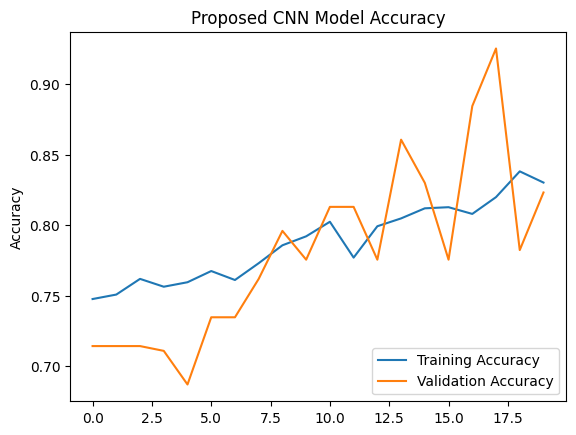

In [ ]:
acc = hist_cnn.history['accuracy']
val_acc = hist_cnn.history['val_accuracy']

acc1 = hist_cnn.history['accuracy'][-1]
val_acc1 = hist_cnn.history['val_accuracy'][-1]

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.title('Proposed CNN Model Accuracy')
plt.show()

### Loss Curve

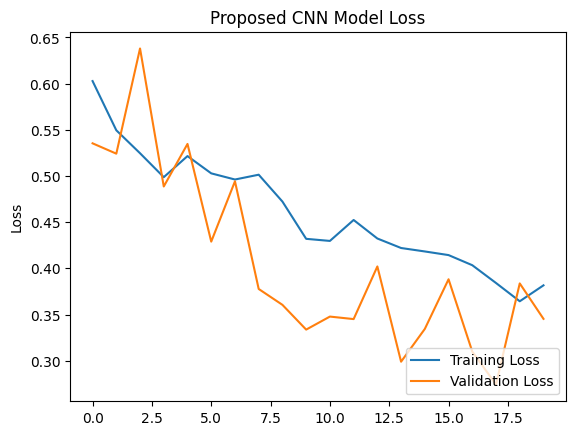

In [ ]:
loss = hist_cnn.history['loss']
val_loss = hist_cnn.history['val_loss']

loss1 = hist_cnn.history['loss'][-1]
val_loss1 = hist_cnn.history['val_loss'][-1]

plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.ylabel('Loss')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.title('Proposed CNN Model Loss')
plt.show()

#storing the results. The below mentioned order of parameter passing is important.

storeResults('Proposed CNN Model',acc1,val_acc1,
             loss1,val_loss1)

# ResNet50

### Accuracy Curve

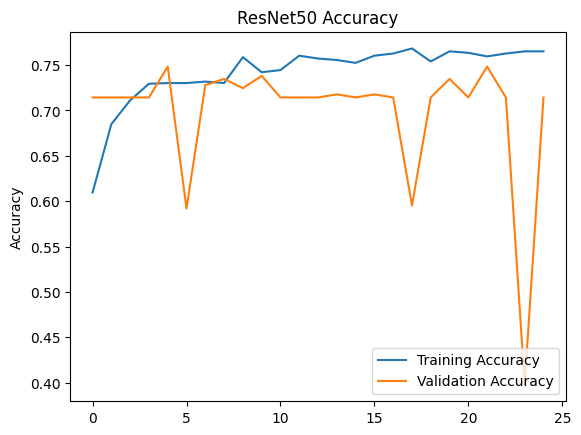

In [ ]:
acc = hist_res.history['accuracy']
val_acc = hist_res.history['val_accuracy']

acc1 = hist_res.history['accuracy'][-1]
val_acc1 = hist_res.history['val_accuracy'][-1]

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.title('ResNet50 Accuracy')
plt.show()



### Loss Curve

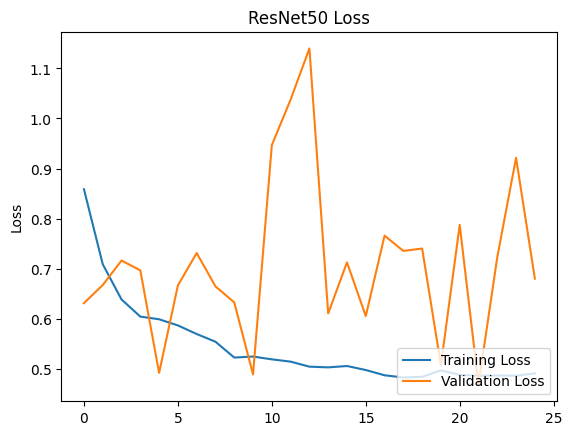

In [ ]:
loss = hist_res.history['loss']
val_loss = hist_res.history['val_loss']

loss1 = hist_res.history['loss'][-1]
val_loss1 = hist_res.history['val_loss'][-1]

plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.ylabel('Loss')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.title('ResNet50 Loss')
plt.show()

#storing the results. The below mentioned order of parameter passing is important.

storeResults('ResNet50',acc1,val_acc1,
             loss1,val_loss1)

# InceptionV3

### Accuracy Curve

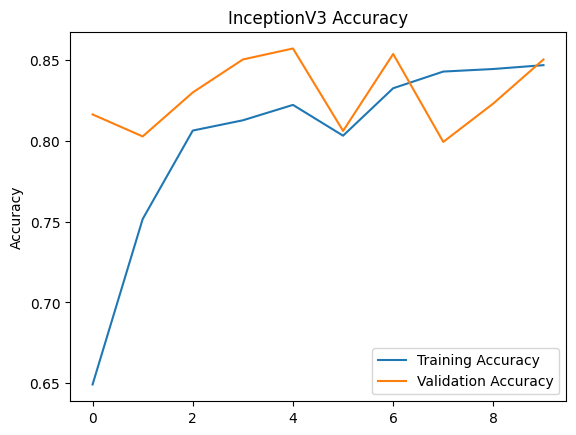

In [ ]:
acc = hist_inc.history['accuracy']
val_acc = hist_inc.history['val_accuracy']

acc1 = hist_inc.history['accuracy'][-1]
val_acc1 = hist_inc.history['val_accuracy'][-1]

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.title('InceptionV3 Accuracy')
plt.show()

### Loss Curve

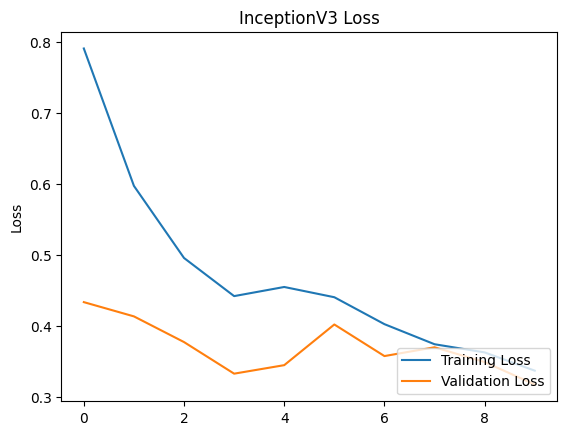

In [ ]:
loss = hist_inc.history['loss']
val_loss = hist_inc.history['val_loss']

loss1 = hist_inc.history['loss'][-1]
val_loss1 = hist_inc.history['val_loss'][-1]

plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.ylabel('Loss')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.title('InceptionV3 Loss')
plt.show()

#storing the results. The below mentioned order of parameter passing is important.

storeResults('InceptionV3',acc1,val_acc1,
             loss1,val_loss1)

# MobileNetV2

### Accuracy Curve

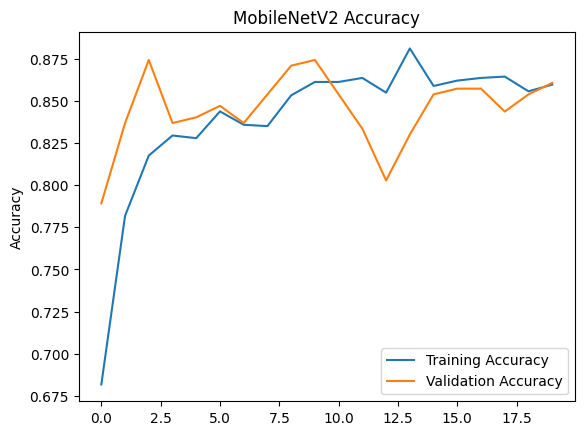

In [ ]:
acc = hist_mob.history['accuracy']
val_acc = hist_mob.history['val_accuracy']

acc1 = hist_mob.history['accuracy'][-1]
val_acc1 = hist_mob.history['val_accuracy'][-1]

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.title('MobileNetV2 Accuracy')
plt.show()

### Loss Curve

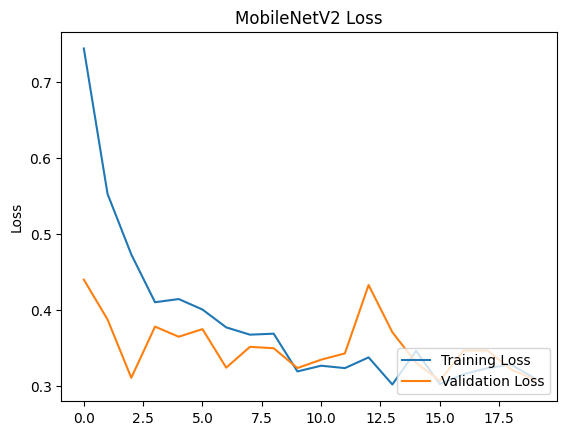

In [ ]:
loss = hist_mob.history['loss']
val_loss = hist_mob.history['val_loss']

loss1 = hist_mob.history['loss'][-1]
val_loss1 = hist_mob.history['val_loss'][-1]

plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.ylabel('Loss')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.title('MobileNetV2 Loss')
plt.show()

#storing the results. The below mentioned order of parameter passing is important.

storeResults('MobileNetV2',acc1,val_acc1,
             loss1,val_loss1)

# VGG16

### Accuracy Curve

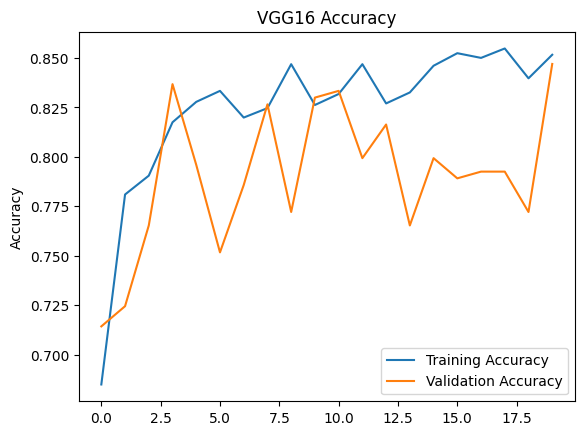

In [ ]:
acc = hist_vgg.history['accuracy']
val_acc = hist_vgg.history['val_accuracy']

acc1 = hist_vgg.history['accuracy'][-1]
val_acc1 = hist_vgg.history['val_accuracy'][-1]

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.title('VGG16 Accuracy')
plt.show()

### Loss Curve

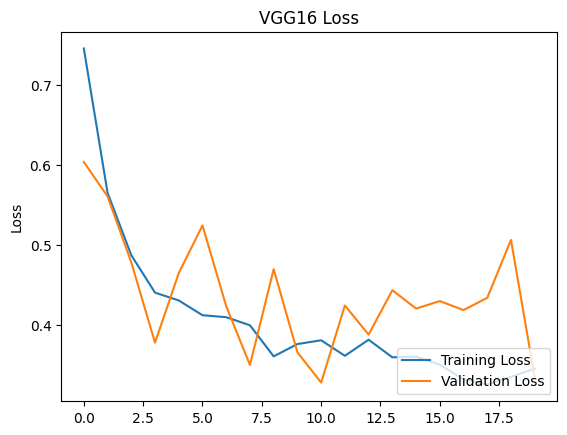

In [ ]:
loss = hist_vgg.history['loss']
val_loss = hist_vgg.history['val_loss']

loss1 = hist_vgg.history['loss'][-1]
val_loss1 = hist_vgg.history['val_loss'][-1]

plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.ylabel('Loss')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.title('VGG16 Loss')
plt.show()

#storing the results. The below mentioned order of parameter passing is important.

storeResults('VGG16',acc1,val_acc1,
             loss1,val_loss1)

## Comparision of Models

In [ ]:
#creating dataframe
result = pd.DataFrame({ 'Deep Learning Model' : Deep_Learning_Model,
                        'Training Accuracy' : Training_accuracy,
                        'Validation Accuracy' : Validation_accuracy,
                        'Training Loss'   : Training_loss,
                        'Validation Loss': Validation_loss,
                      })

In [ ]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Training Accuracy'],ascending=False).reset_index(drop=True)

In [ ]:
# dispalying total result
sorted_result

,Deep Learning Model,Training Accuracy,Validation Accuracy,Training Loss,Validation Loss
0,MobileNetV2,0.860,0.861,0.309,0.308
1,VGG16,0.852,0.847,0.345,0.334
2,InceptionV3,0.847,0.850,0.337,0.317
3,Proposed CNN Model,0.830,0.823,0.382,0.345
4,ResNet50,0.765,0.714,0.491,0.680


In [ ]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Validation Accuracy'],ascending=False).reset_index(drop=True)

In [ ]:
sorted_result

,Deep Learning Model,Training Accuracy,Validation Accuracy,Training Loss,Validation Loss
0,MobileNetV2,0.860,0.861,0.309,0.308
1,InceptionV3,0.847,0.850,0.337,0.317
2,VGG16,0.852,0.847,0.345,0.334
3,Proposed CNN Model,0.830,0.823,0.382,0.345
4,ResNet50,0.765,0.714,0.491,0.680
